# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### Student 3 - __[student3@ulb.ac.be](mailto:student3@ulb.ac.be) - Student ID 345678__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [1]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

The dataset on which we will have to establush predictions for the DrivenData is also loaded.

In [2]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

The X dataset contains 59400 samples with 40 different features, of which 30 are categorical and 10 are numerical.

In [3]:
options(repr.matrix.max.cols=50)
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55657   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [4]:
categorical_variables <- which(sapply(X[1,],class)=="factor")
length(categorical_variables)

[1] 30

The target variable is a categorical variable with 3 different levels, indicating if the water pump is functional, functional but needs repair or non functional.

In [395]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55657                                  
 Max.   :74247                                  

This histogram shows the number of samples corresponding to each class of the target variable. Notice that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional\ needs\ repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

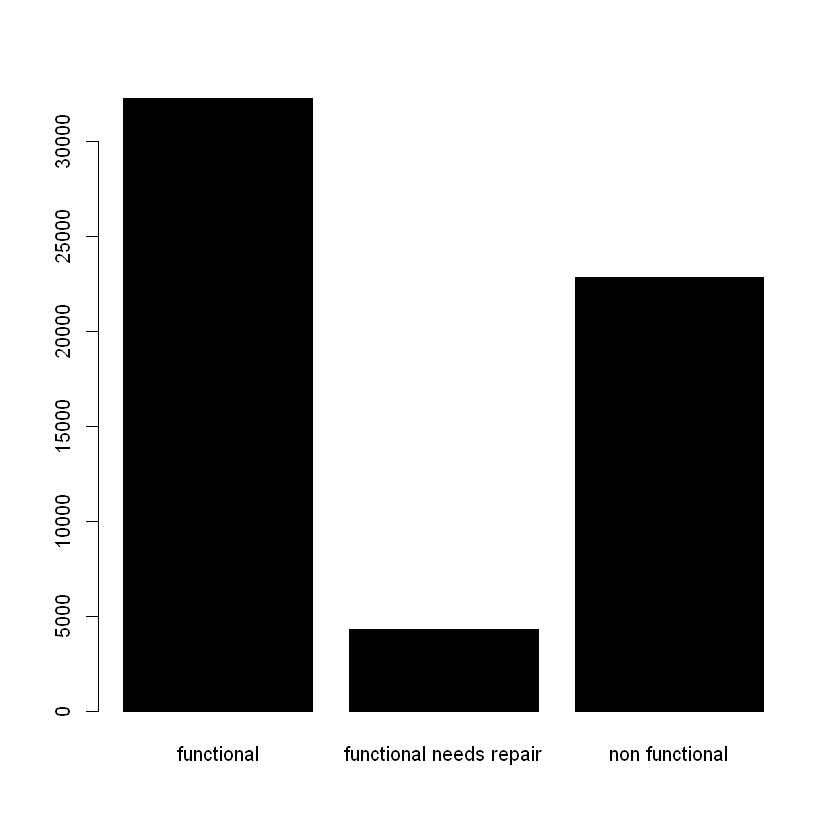

In [148]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


We check if there are any NA values in the dataset. The results show that no empty values are present in either dataset.

In [5]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings or $none$ strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [6]:
data <- merge(X,Y)
dim(data)
head(data)
demo_data <- data

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


By representing the number of missing values for each categorical variable, it stands out that the feature $scheme\_name$ has nearly 50% of missing values. The missing values will be treated in several different ways :
- removing the samples with the missing values
- considering the missing values as a category on their own
- keeping only the relevant classes of the problematic features through one hot encoding (for example discard the column resulting from the none class in the one hot encoding but keeping the rest)

In [8]:
empty_count <- c()
for (c in colnames(data[,categorical_variables])) { 
    a <- dim(data[data[,c] == "none" | data[,c] == "",])[1]
    empty_count <- c(empty_count,a)
}

df <- data.frame(variable=colnames(data[,categorical_variables]),empty_count=empty_count,percentage=empty_count/nrow(data))
df[df$empty_count != 0,]

,variable,empty_count,percentage
,<chr>,<int>,<dbl>
2,funder,3635,0.061195286
3,installer,3655,0.061531987
4,wpt_name,3563,0.059983165
6,subvillage,371,0.006245791
10,public_meeting,3334,0.056127946
12,scheme_management,3877,0.065269360
13,scheme_name,28191,0.474595960
14,permit,3056,0.051447811


In [253]:
barplot(table(data[,scheme_name]))

ERROR: Error in `[.data.frame`(data, , scheme_name): objet 'scheme_name' introuvable


In [9]:
remove_scheme_name <- function(df) {
    return(subset(df,select=-c(scheme_name)))
}

## Dataset balancing

In order to avoid the previously described situation where the models will predict only the very frequent classes, some dataset balancing can be done. It is important to understand this does not necessarily yield better results, but it could, and this is why it was implemented. Indeed, sometimes the frequency of apparition of certain classes is actually very relevant, and moreover if the dataset is large enough the minority class might be representative enough in the sense that it contains all relevant information in its features to be classified.

The 2 dataset balancing techniques that were tested are SMOTE and oversampling.

### SMOTE

In [ ]:
install.packages("performanceEstimation")

In [255]:
library(performanceEstimation)

In [10]:
create_smote_dataset <- function(df) {
    df <- smote(status_group ~ ., df, perc.over = 3,perc.under=3)
    return(df)
}

In [155]:
demo_data <- create_smote_dataset(demo_data)

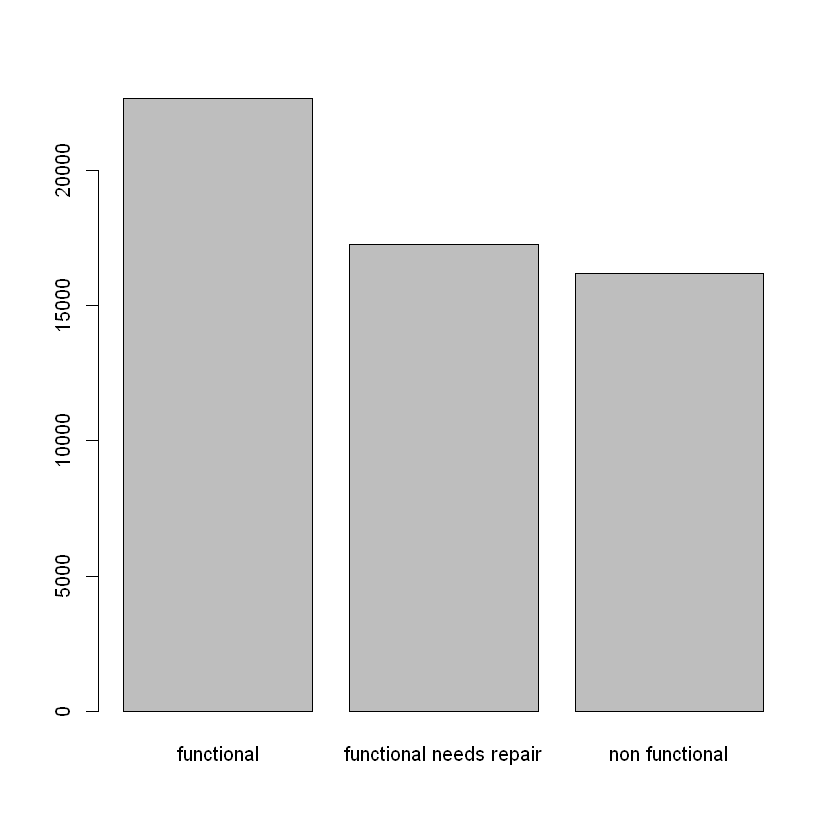

In [156]:
barplot(table(demo_data$status_group))

In [64]:
dim(demo_data)

[1] 56121    41

### Over sampling

In [11]:
create_over_sampling_dataset <- function(df) {
    to_dup <- df[data$status_group == "functional needs repair",]
    for(i in 1:4) {
        df <- rbind(df,to_dup)
    }
    to_remove <- which(data$status_group == "functional")[1:10000]
    #print(to_remove)
    return(df[-to_remove,])
}

In [ ]:
demo_data <- data

In [ ]:
dem <- create_over_sampling_dataset(demo_data)

In [ ]:
barplot(table(dem$status_group))

In [ ]:
dim(demo_data)

## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [12]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [13]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [14]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [90]:
demo_data <- remove_useless_features(demo_data)

In [161]:
dim(demo_data)

[1] 56121    41

## Boolean features

By analyzing the features that contain 3 classes, we see that some of them are boolean features ($public\_meeting$ and $permit$), which take the values True, False or an empty string. There is also a feature $source_class$ that contains only 2 classes and an $unknown$ class. By analyzing the distribution of the different classes of these features, we can see that the missing values are always very minoritary, we could therefore remove the problematic samples and encode these features as boolean 0-1 features.

[1] "public_meeting"
[1] 
Levels:  False True
[1] "permit"
[1] True
Levels:  False True


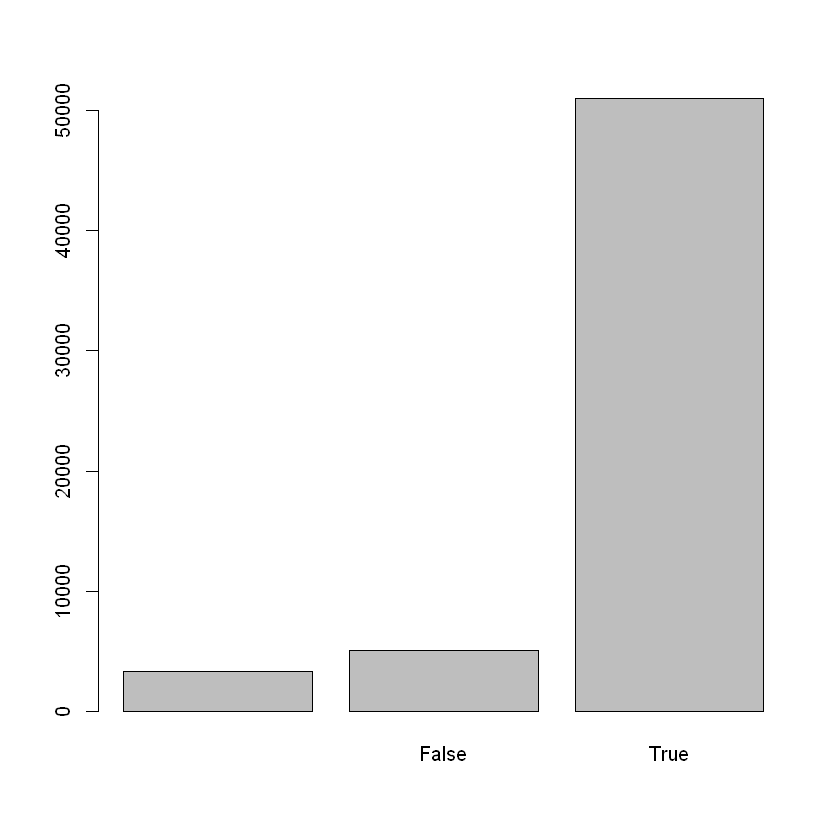

[1] "source_class"
[1] groundwater
Levels: groundwater surface unknown


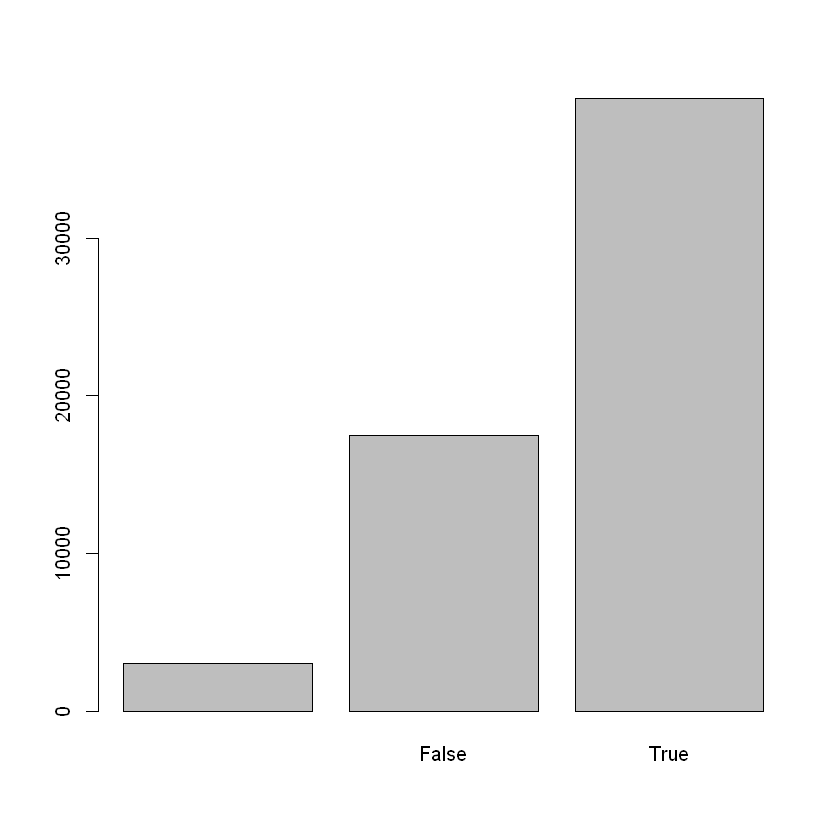

[1] "status_group"
[1] non functional
Levels: functional functional needs repair non functional


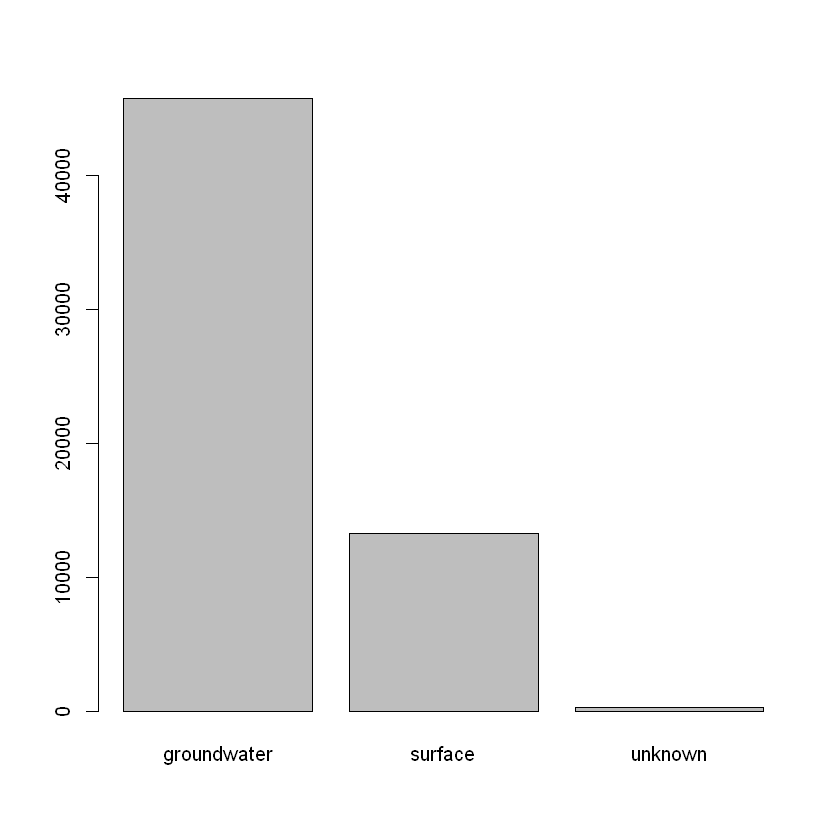

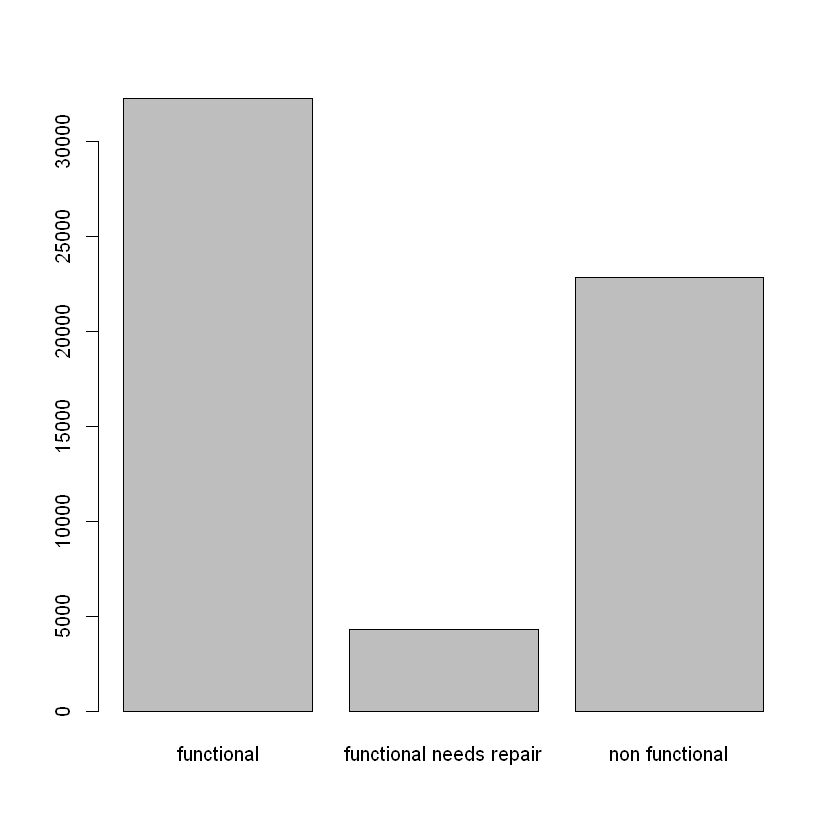

In [15]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l == 3) {
        print(n)
        print(data[1,n])
        barplot(table(data[,n]))
    }
}

In [16]:
create_binary_features <- function(df) {
    df <- df[df$public_meeting != "", ] 
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    df <- df[df$permit != "", ] 
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    df <- df[df$source_class != "unknown", ] 
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one.

In [17]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    return(df)
}

In [94]:
demo_data <- convert_date_to_numeric(demo_data)

In [264]:
head(demo_data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


### Handpicking redundant features

Some features are noticeably redudant at first sight, and we can therefore reduce the number of features.

In [ ]:
table(data$extraction_type)
table(data$extraction_type_group)
table(data$extraction_type_class)

In [ ]:
table(data$management)
table(data$scheme_management)

In [ ]:
table(data$waterpoint_type)
table(data$waterpoint_type_group)

In [ ]:
table(data$source)
table(data$source_type)

In [ ]:
table(data$quantity)
table(data$quantity_group)

In [ ]:
table(data$water_quality)
table(data$quality_group)

In [ ]:
table(data$payment)
table(data$payment_type)

In [38]:
remove_redundant_features <- function(df) {
    df <- subset(df,select=-c(extraction_type,scheme_management,waterpoint_type_group,source_type,quantity_group,quality_group,payment))
    return(df)
}

### Handle the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region.

In [ ]:
plot(data$longitude,data$latitude)

There seems to be some outliers having coordinates (0,0), which we will remove since they represent null values :

In [18]:
discard_unrealistic_coordinates <- function(df) {
    df <- df[df$longitude > 20 & df$latitude <0,]
    return(df)
}

In [96]:
demo_data <- discard_unrealistic_coordinates(demo_data)

In [97]:
dim(demo_data)

[1] 54034    40

The new longitudes and latitudes, after filtering, are represented below :

In [ ]:
plot(demo_data$longitude,demo_data$latitude)

In [ ]:
install.packages("factoextra")


In [267]:
library(factoextra)

Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [19]:
generate_regions <- function(df) {
    set.seed(19)
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    km_res <- kmeans(coordinates,8)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}
#head(km.res$cluster,20)

In [20]:
best_correlation <- 0
best_seed <- 1
correlations <- numeric(length(5:40))
dum <- dummy.data.frame(data[,ncol(data),drop=F],names=c("status_group"), sep="_")
coordinates <- as.data.frame(cbind(data$longitude,data$latitude))

for(k in 5:40) {
    for(s in 1:30) {
        set.seed(s)
        km_res <- kmeans(coordinates,k)
        region_kmeans <- km_res$cluster

        correlation <- 0
        for(i in 1:ncol(dum)) {
            correlation <- correlation + abs(cor(region_kmeans,dum[,i]))
        }
        correlations[k] <- correlations[k] + correlation
        if(correlation > best_correlation) {
            best_k <- k
            best_correlation <- correlation
            best_seed <- s
        }
    }
}


ERROR: Error in dummy.data.frame(data[, ncol(data), drop = F], names = c("status_group"), : impossible de trouver la fonction "dummy.data.frame"


In [411]:
best_k
best_correlation
best_seed

[1] 8

[1] 0.3210632

[1] 19

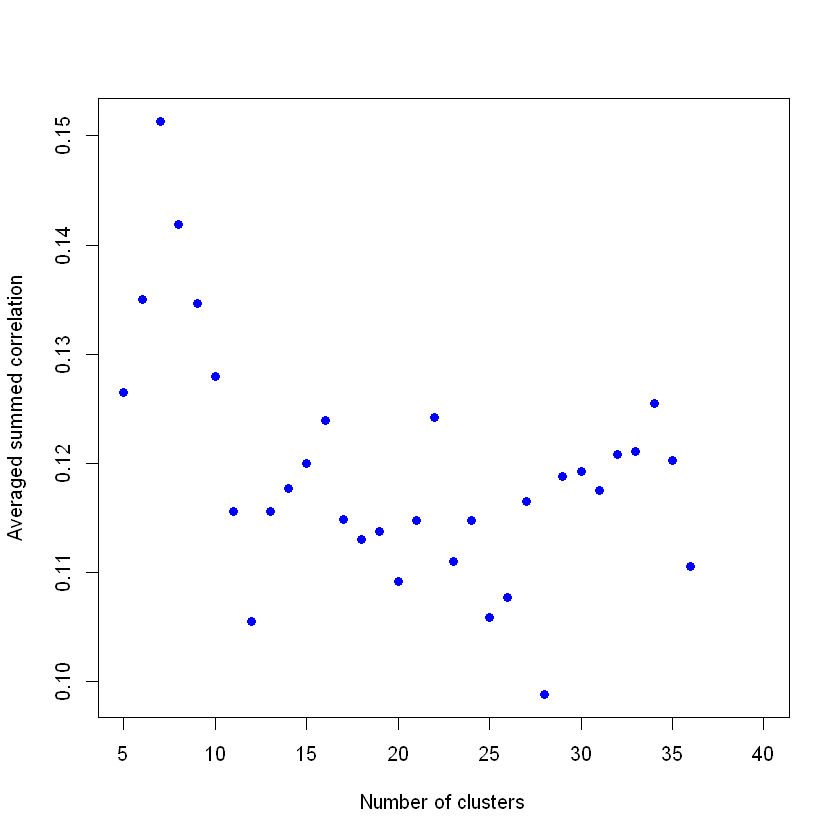

In [412]:
mean_cor <- correlations / 30
plot(5:40,mean_cor[5:40],xlab="Number of clusters",ylab="Averaged summed correlation",col = "blue",pch=19)

In [21]:
closest_cluster <- function(x) {
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    #print(centers)
    #print(paste("x:",x))
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [22]:
set_existing_regions <- function(df) {
    print(head(df))
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

In [23]:
options(repr.matrix.max.cols=50)
head(eval_data,20)
head(data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
2,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
4,45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
5,49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7,24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.39804,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,28965,0,2013-01-25,Finw,234,FinW,39.60742,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
9,36301,30,2013-01-23,Unicef,584,LGA,39.26295,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


The graphical representation of the regions after the k-means clustering is shown below.

In [416]:
coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))
km_res <- kmeans(coordinates,20)
demo_data <- subset(demo_data,select=-c(longitude,latitude))
demo_data$region_kmeans <- km_res$cluster

In [ ]:
fviz_cluster(km_res,coordinates)

Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [82]:
options(repr.matrix.max.cols=50)
head(data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [24]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 1000 & n != "installer") {
        print(n)
        problematic_features <- c(problematic_features,n)
        print(data[1,n])
    }
}
problematic_features

[1] "funder"
[1] Tasaf
1898 Levels:  0 A/co Germany Aar Abas Ka Abasia ... Zingibali Secondary
[1] "wpt_name"
[1] Mratibu
37400 Levels: 24 A Kulwa A Saidi Abass Abbas Abdala Hamisi ... Zuwena Kindo
[1] "subvillage"
[1] Majengo
19288 Levels:  'A' Kati ## 1 14Kambalage 18 19 20 22B 23B 24 24B 30 42 43 ... Zuri
[1] "ward"
[1] Igalula
2092 Levels: Aghondi Akheri Arash Arri Arusha Chini Babayu Badi Badugu ... Zuzu
[1] "scheme_name"
[1] 
2697 Levels:  14 Kambarage A ADP ADP Simbo ADP Simbu Adra ... Zuzu


[1] "funder"      "wpt_name"    "subvillage"  "ward"        "scheme_name"

For each one of these features, we check the distribution of the different categories.

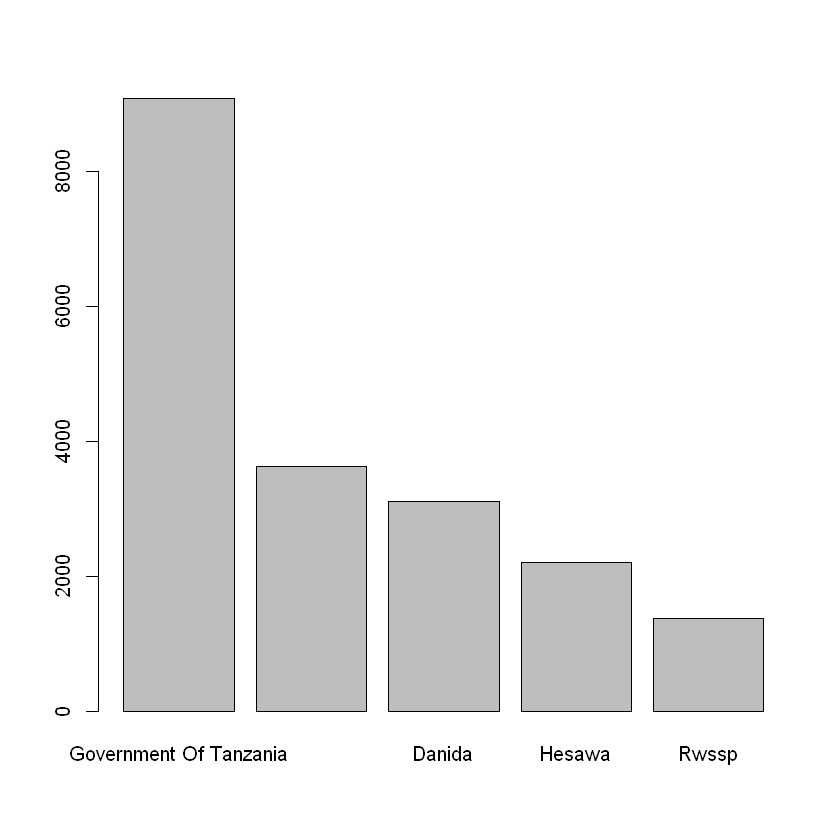

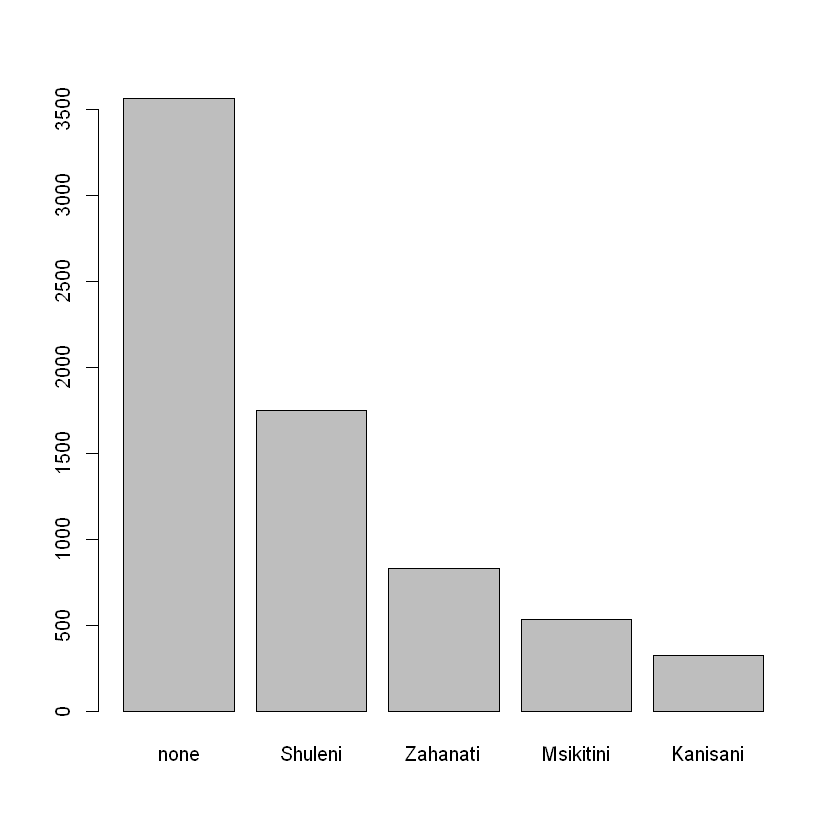

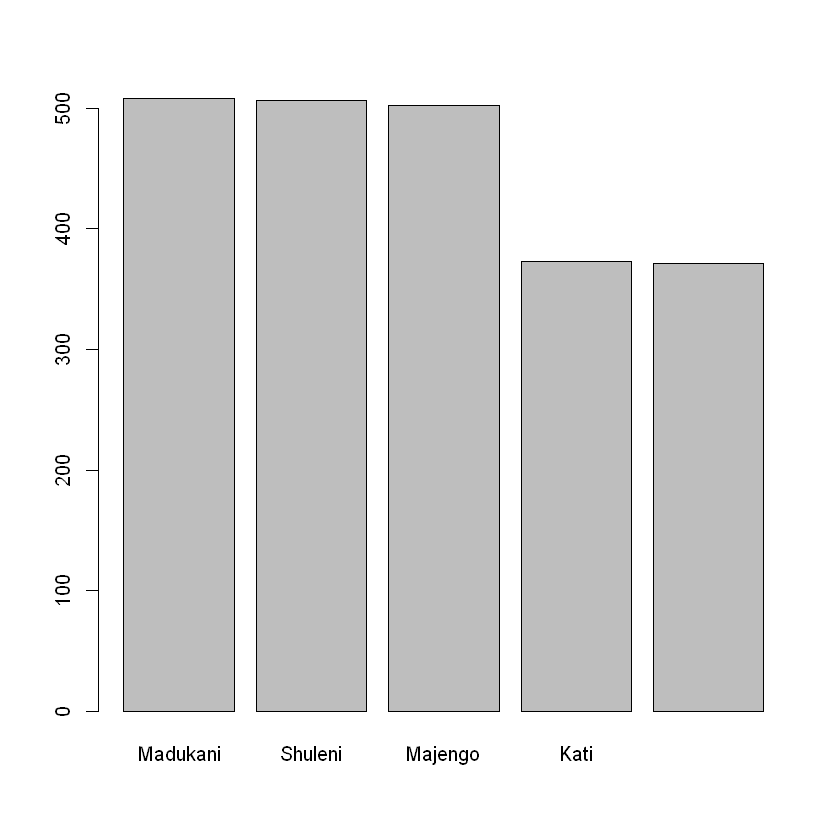

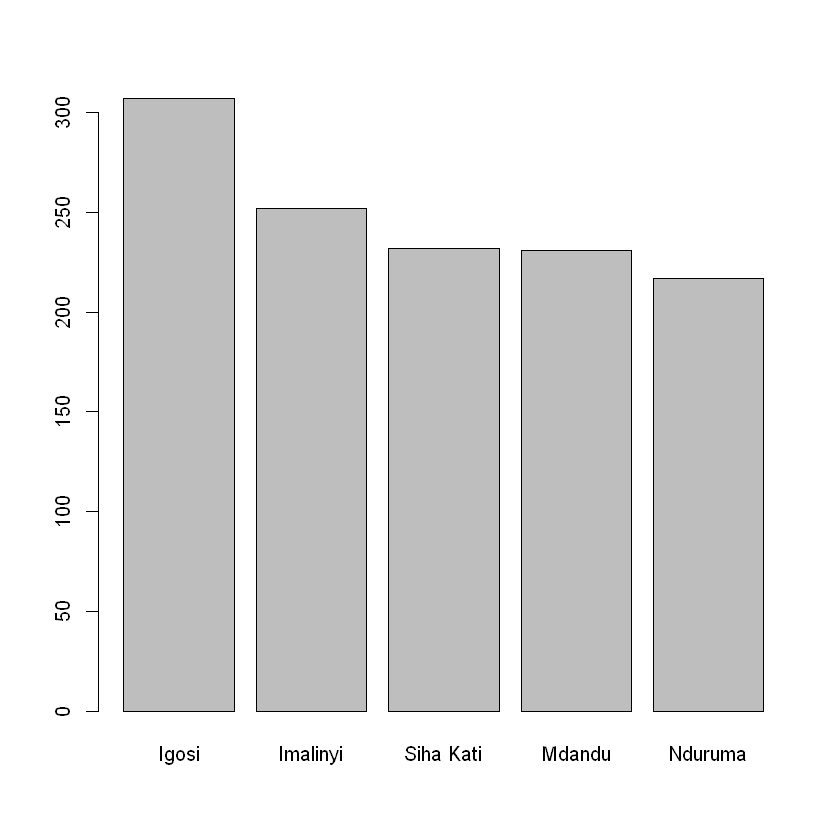

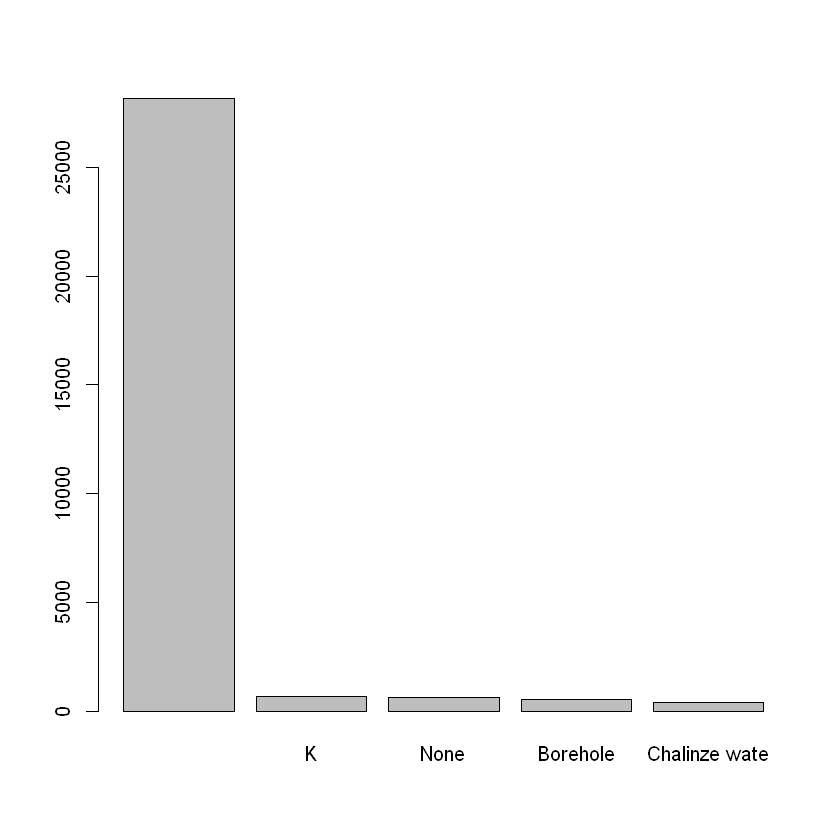

In [25]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

By taking a look at the barplots, some features might be interesting to keep because they have a large dominance in one category. For example, the $installer$ feature contains more than 16000 samples with the category $DWE$ so it might be useful to simply keep track of whether the installer is DWE or not (binary value).

In [26]:
convert_installer_to_binary <- function(df) {
    levels(df$installer) <- c(levels(df$installer), "1","0") 
    df$installer[df$installer == "DWE"] <- 1
    df$installer[df$installer != "1"] <- 0
    df <- transform(df, installer = as.integer(as.character(installer)))
    return(df)
}

By analyzing the rest of the barplots, either there are extremely few samples of each category of the feature, or there are majoritarily samples containing $none$ or an empty string. Therefore, we choose to remove them from the dataset.

In [27]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-which(names(df) %in% problematic_features))
    return(df)
}

In [28]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"

In [47]:
install.packages('dummies')

Installing package into 'C:/Users/minhx/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minhx\AppData\Local\Temp\RtmpmiPYH5\downloaded_packages


In [29]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns




In [30]:
one_hot_encoding_training <- function(df) {
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [31]:
one_hot_encoding_test <- function(df) {
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

[1] 59400    14

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group,status_group_functional,status_group_functional needs repair,status_group_non functional
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
1,0,0,0,33.12583,-5.118154,0,14,3,0,0,non functional,0,0,1
2,1,0,1978,34.77072,-9.395642,0,11,4,20,2008,functional,1,0,0
3,2,0,0,36.11506,-6.279268,0,1,4,0,0,functional,1,0,0
4,3,10,1639,37.14743,-3.187555,0,3,5,25,1999,functional,1,0,0
5,4,0,0,36.16489,-6.099289,0,1,4,0,0,non functional,0,0,1
6,5,50,28,39.28612,-6.972403,0,60,43,6922,0,functional,1,0,0


,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,region_kmeans
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,0,0,2012-11-13,Tasaf,0,TASAF,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,1
2,1,0,2011-03-05,Shipo,1978,SHIPO,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,18
3,2,0,2011-03-27,Lvia,0,LVIA,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional,4
4,3,10,2013-06-03,Germany Republi,1639,CES,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,12
5,4,0,2011-03-22,Cmsr,0,CMSR,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,4
6,5,50,2011-02-26,Private,28,Private,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional,3


# Feature selection

## mRMR on one-hot encoded data

In [368]:
apply_mrmr_numerical <- function(df) {
    #print(head(df[,ncol(df)]))
    X <- subset(df,select=-c(status_group))
    print(colnames(X))
    
    dum <- dummy.data.frame(subset(df,select=c(status_group)),names=c("status_group"), sep="_")
    correlation <- numeric(ncol(X))
    #print(head(dum))
    #print(head(dum[,1]))
    for(i in 1:ncol(dum)) {
        correlation <- correlation + abs(cor(X,dum[,i]))
    }
    correlation <- correlation / 3
    #print(correlation)
    n <- ncol(X)
    selected_features <- c()
    candidate_features <- 1:n
    #message(correlation)
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if (length(selected_features)>0) {
            cor_selected_candidates <- cor(X[,selected_features,drop=F],X[,candidate_features,drop=F])
            redundancy_score <- apply(cor_selected_candidates,2,mean)
        }
        mRMR_score <- correlation[candidate_features] - redundancy_score
        best_candidate <- candidate_features[which.max(mRMR_score)]
        message(best_candidate)
        selected_features<-c(selected_features,best_candidate)
        
        candidate_features <- setdiff(candidate_features,best_candidate)
    }
    return(selected_features)
}

In [369]:
get_k_mrmr_variables <- function(df,k) {
    sorted_features <- apply_mrmr_numerical(df[,1:ncol(df)])    
    df <- df[,sorted_features[1:k]]
    return(df)
}

## mRMR on categorical data

In [370]:
apply_mrmr <- function(X,Y) {
    selected_features <- c()
    n <- ncol(X)
    candidate_features <- 1:n
    correlation <- c()
    for (i in 1:n) {
        chi_value <- chisq.test(X[,i], Y)
        correlation[i] <- chi_value$statistic
    }
    message(correlation)
    correlation <- correlation/max(correlation)
    redundancy_score <- c()
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if(length(selected_features) > 0) {
            for (c in 1:length(candidate_features)) {
                redundancy_cor <- numeric(length(selected_features))
                for (s in 1:length(selected_features)) {
                    #print(length(X[,selected_features[s]]))
                    #print(length(X[,candidate_features[c]]))
                    chi_value <- chisq.test(X[,selected_features[s]],X[,candidate_features[c]])
                    redundancy_cor[s]  <- chi_value$statistic
                    message(chi_value$statistic)
                }
                message(redundancy_cor)
                redundancy_score[c] <- mean(redundancy_cor)
            }
        }
        #message(redundancy_score)
        mRMR_score <- correlation[candidate_features] - redundancy_score
        #message(mRMR_score)
        #message(candidate_features)
        max_score_candidate <- candidate_features[which.max(mRMR_score)]
        message(max_score_candidate)
        selected_features <- c(selected_features,max_score_candidate)
        candidate_features <- setdiff(candidate_features,max_score_candidate)
    }
    #write(selected_features,"selected_features.txt")
    #print(selected_features)
}

## PCA

In [33]:

pca2 <- function(df,nb_components){
    X <- df[,setdiff(colnames(df),"status_group")]
    # Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
    X_pca <- prcomp(X, scale=TRUE) 

    ## make a scree plot
    X_pca.var <- X_pca$sdev^2
    X_pca.var.per <- round(X_pca.var/sum(X_pca.var)*100, 1)
 
    barplot(X_pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

    return(X_pca)

}

pca2_select <- function (df,X_pca,nb_components){
   
    X_pca <- predict(X_pca,newdata=df)[,1:nb_components]
   
    #df_pca<-data.frame(X_pca,df[,"status_group"])
    #names(df_pca)[length(names(df_pca))]<-"status_group" 
    return(X_pca)
}


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC2,PC20,PC21,PC22,PC23,PC24,PC25,PC3,PC4,PC5,PC6,PC7,PC8,PC9,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
42500,2.0650709,0.6657258,-0.4946925,2.1653761,0.4020257,-1.1448786,-0.1304074,0.8216918,0.8912444,0.46180073,-0.2364658,1.28598200,-0.70637707,-1.5109322,0.06733030,-0.06488377,-1.85280317,3.4818701,-2.8547696,-0.445384983,4.80793558,-1.5289399,1.8440529,-1.7571245,1.5681639,functional
36826,0.9488555,0.7581389,-0.7667154,0.4291154,-0.3046899,0.2621719,0.3075217,1.1791512,-2.0028988,-0.92844772,-0.4594058,-0.03446098,-0.07336701,0.7585264,-0.26133142,-0.06969975,0.85020459,-0.6177279,-2.1685618,0.382154613,-0.16886171,0.4754943,-0.2700024,1.1525674,2.1050952,non functional
49600,2.8895709,-1.3449811,1.5704716,-2.6710111,5.1572792,2.4468786,0.8477324,-0.6123600,3.8385666,0.02933881,1.6127331,-1.39008639,-0.38380520,3.0587699,-1.20423356,0.14503649,0.06311228,0.2031535,-0.3085020,3.808372018,-2.59026939,-3.1129080,-5.6568288,-0.1865847,0.2855469,non functional
54596,-3.9195319,0.3854242,-0.9523399,0.3674390,-0.7025876,0.8253099,0.2039055,-0.5110381,-0.3265390,-0.63841402,-0.1653484,0.59782315,1.27262209,0.3879825,0.44473869,-0.12838017,-0.82586676,0.5960112,2.0741863,-0.889914827,-0.75289971,-2.3879045,-3.1444609,-0.7555036,-1.4674581,functional
28119,3.3991336,0.3486686,0.3068546,-0.2447175,0.3414236,-1.7320421,-0.7848755,0.8481176,-0.5334513,0.42935324,0.4819838,2.50725184,0.03322591,-0.6044460,-0.57659246,0.28811741,0.61820798,-0.5079180,0.4954165,-0.001210976,-0.12084959,-0.3928383,0.4876881,0.4145130,-0.6054287,functional
43196,1.2932197,1.1820415,0.5495203,0.9632557,0.3847366,2.2715793,-2.4818002,1.1651329,0.2741389,-0.49370076,0.7721597,-1.16407783,0.67734941,-0.2117507,0.06053791,0.04268399,0.15245463,0.5437075,2.0314938,1.092532598,-0.02178361,-0.9041785,2.6810126,2.0329226,0.8045137,functional


             PC1         PC2          PC3        PC4        PC5         PC6
42500 -1.0158533  1.72184389  0.442224108  0.6743654 -0.8924181  0.07277876
36826 -0.3073428 -0.63670550 -0.009976138  0.6237301  0.8719080 -0.39815690
49600  1.9910169  1.14385155 -1.391772557  2.6983375 -2.0639403 -3.44090941
54596  2.8119925 -0.50064306  0.140223200 -0.6105466  0.3260576  0.69296159
28119 -0.1970631  0.02864245  0.422022059  0.2631927 -0.2755116 -0.57795922
43196  0.1040979  1.45551757 -0.875971943 -0.7648679 -0.3683957  0.89600157
               PC7         PC8         PC9         PC10       PC11       PC12
42500  1.268133891  0.73381147 -2.10286845 -0.852759338 -1.8011222  0.1166165
36826  0.530812172  0.22675121  0.06573028  0.006613268 -1.3909042 -0.2919732
49600  0.008639652  0.12142838 -0.14971856  1.282220799  3.4381305  0.4344511
54596  0.087277774 -0.07786271 -0.28245130  1.671876748  0.4839874 -0.4287213
28119 -0.292642923  0.23571549  1.15918418 -0.699179798 -0.8694952 -1.0419726


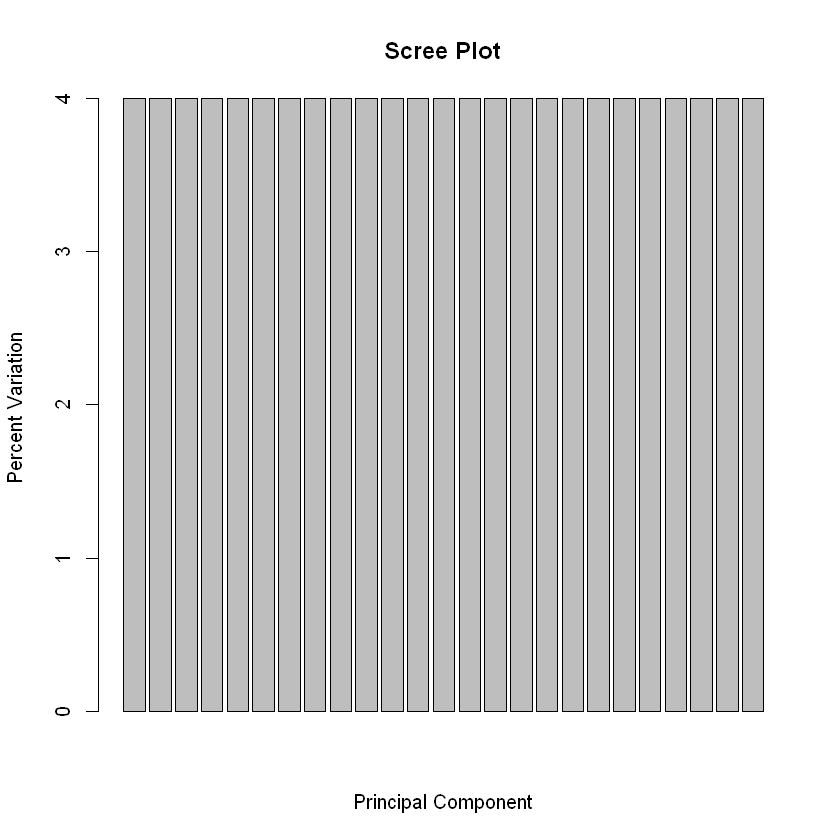

In [103]:
library(dummies)
load(file = "data_preproc.Rdata")

#for (i in 1:CV_folds) {
#}
#X<-data_preprocessed[,setdiff(colnames(data_preprocessed),"imdb_score")]

data_preproc_onehot <- dummy.data.frame(data_preproc, sep="_")
colnames(data_preproc_onehot) <- gsub(colnames(data_preproc_onehot),pattern = " ", replacement = "_")
targets <- c("status_group_functional","status_group_functional_needs_repair","status_group_non_functional")
X <- data_preproc_onehot[,setdiff(colnames(data_preproc_onehot),targets)]
#X<- subset(as.data.frame(data_preproc),select=-c(targets[1]))
#X<-data_preproc_onehot[,setdiff(colnames(data_preproc_onehot),targets[1])]
head(data_preproc)

#head(Y)

for (target in targets) {
    Y <- data_preproc_onehot[,target]
    names(Y)[length(names(Y))]<- target
    #pca(X,Y)
}
X_pca <- pca2(data_preproc)
train <- pca2_select(data_preproc,X_pca,20)
test <- pca2_select(data_preproc,X_pca,20)

#test <- predict(X_pca, newdata =data_preproc_onehot[,setdiff(colnames(data_preproc_onehot),"status_group")])[,1:20]
#tt <- predict(X_pca) # the standard way
#print(head(tt))
#tt3 <- predict(X_pca)[,1:3]
print(head(train))
print(head(test))
#X_pca <- X_pca[,1:nb_components]
#print(X_pca)
#X <- subset(df,select=-c(status_group))
#data <- subset(data,select=-c(status_group))
#print(colnames(X))
#X<-data_preprocessed[,setdiff(colnames(data_preprocessed),"imdb_score")]
#Y<-as.data.frame(data_preproc[,"status_group"])
#head(Y)
#head(data_preproc)
#Y <- as.data.frame(dummy.data.frame(subset(as.data.frame(data_preproc),select=c(status_group)),names=c("status_group"), sep="_"))
#print(head(dum))
#data_preproc<-cbind(X,Y)
#head(data_preproc)


# Call the preprocessing functions

In [180]:
preprocess_training <- function(df) {
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    df <- create_smote_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    df_no_status <- get_k_mrmr_variables(df,100)
    df_no_status <- subset(df_no_status,select=-c(status_group))
    df_ordered <- df_no_status[,order(names(df_no_status))]
    #print(head(df_ordered))
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    return(df)
}

In [35]:
preprocess_training2 <- function(df) {
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    
    df <- remove_useless_features(df)
    df <- create_binary_features(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    #df <- create_smote_dataset(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    df <- df[,order(colnames(df))]
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    print(head(df))
    #df_no_status <- pca2(df,25)
    X_pca <- pca2(df)
    save(X_pca, file = "X_pca.Rdata")
    df_no_status <- pca2_select(df,X_pca,100)
    
    #df_no_status <- subset(df_no_status,select=-c(status_group))
    df_ordered <- df_no_status[,order(colnames(df_no_status))]

    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    
    return(df)
}

In [207]:
preprocess_test <- function(df) {
    df <- remove_useless_features(df)
    df <- convert_date_to_numeric(df)
    df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
    
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    return(df)
}

In [36]:
preprocess_test2 <- function(df) {
    df <- remove_useless_features(df)
    df <- convert_date_to_numeric(df)
    #df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
    
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    
    print(head(df))

    load(file = "X_pca.Rdata")
    df_no_status <- pca2_select(df,X_pca,100)
    df_ordered <- df_no_status[,order(colnames(df_no_status))]

   # df_no_status <- subset(df_no_status,select=-c(status_group))
    #df_ordered <- df_no_status[,order(colnames(df_no_status))]

    return(df_ordered)
}

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

  amount_tsh basin_Internal basin_Lake_Nyasa basin_Lake_Rukwa
2          0              0                0                0
3          0              0                0                0
4         10              0                0                0
5          0              0                0                0
6         50              0                0                0
7          0              1                0                0
  basin_Lake_Tanganyika basin_Lake_Victoria basin_Pangani basin_Rufiji
2                     0                   0             0            1
3                     0                   0             0            0
4                     0                   0             1            0
5                     0                   0             0            0
6                     0                   0             0            0
7                     0                   0             0            0
  basin_Ruvuma_/_Southern_Coast basin_Wami_/_Ruvu construction_year
2

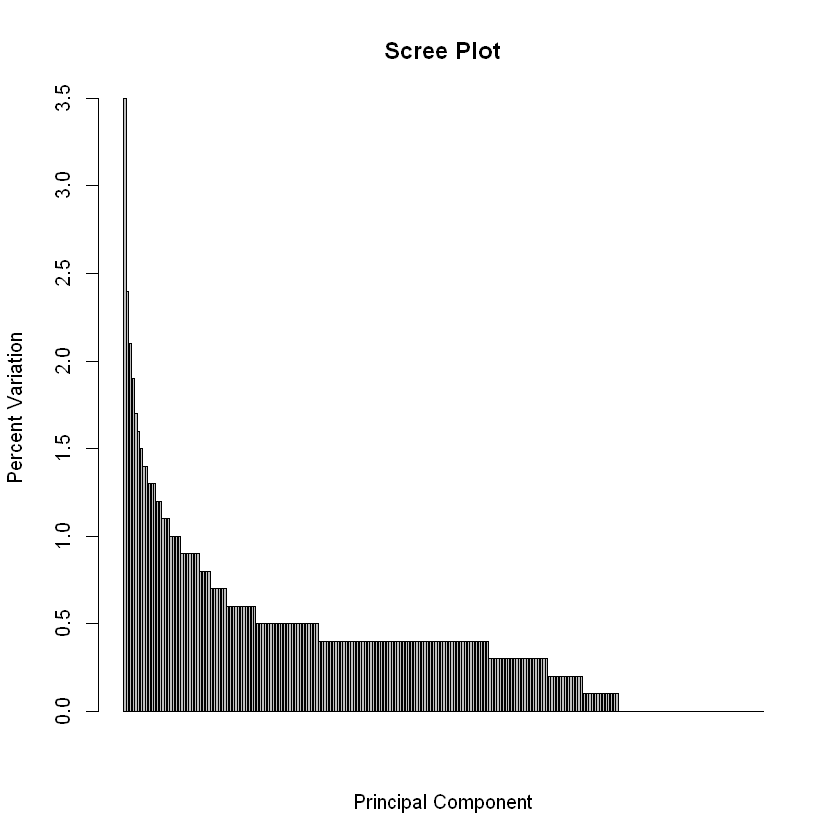

In [39]:
data_preproc <- preprocess_training2(data)
save(data_preproc, file = "data_preproc.Rdata")

,PC1,PC10,PC100,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC2,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC3,PC30,...,PC78,PC79,PC8,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC9,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,-0.4439429,3.271290,0.06311874,-4.1252383,1.9915656,-0.9000948,-0.240045119,2.3986785,-1.833868,-0.2831008,-4.16649567,2.70654747,3.0612158,2.0935205,0.412830863,-5.2825900,-11.4695148,3.0980778,0.6208244,-4.2286898,-4.9921310,-2.812598948,2.66449909,-3.67773622,-2.1220655,...,-0.24330600,-0.2135878,-0.6403020,0.09308543,0.3163396,0.1130461,0.8615588,0.3091160,-0.3989287,-0.2058565,0.15067214,-0.55389025,-0.5790466,-3.6711249,0.1399192,0.058606347,0.08813051,-0.01247315,-0.425792815,-0.04197584,-0.24030041,0.21735040,-0.2393107,0.13985534,functional
3,-1.6182408,-0.749476,-1.84096691,-1.3006044,2.7711901,0.6813534,-2.034508615,-3.3573960,2.454399,-0.3408232,0.04746375,0.48144588,-4.5145513,1.4522025,0.546209016,-0.5254788,-1.3480035,-0.6382263,0.5736552,-0.5550384,0.2176294,1.099327356,0.19328719,-1.49655429,-0.2021576,...,0.05839154,-0.5112613,2.1211044,-1.87854854,0.7412946,-1.0846189,-1.5790421,0.9634706,-0.2789797,-0.2281449,-0.32814941,-1.40819031,0.2690349,1.1080383,-0.4724411,0.847662964,-0.06953225,3.07953339,0.630785026,0.45668883,0.07364609,-2.30232936,-1.2687648,-0.14589573,functional
4,4.7390927,0.166518,0.33141762,0.9235705,1.7896490,1.0566870,0.002945218,-0.0375771,-1.048711,3.1985255,-0.43384574,0.91350895,-1.0085160,-0.2970865,0.004971248,2.0795771,-0.7172651,-0.7055749,3.0339105,-0.7132771,-1.1119757,1.143165345,0.08455826,2.91719507,-1.1161875,...,-0.81510903,-1.3016100,-2.6812021,-1.65123375,-0.6472191,1.2501264,1.5257414,1.6147336,-0.3111334,0.1196255,-0.02687759,1.22141946,0.3977090,1.0355322,-1.5440299,-0.007307217,0.87248622,1.18313547,-1.147447987,0.83865743,-0.69138679,0.03579773,-0.9535018,0.51420338,functional
5,-3.3644464,-1.737531,-1.82379367,-0.4948422,1.9871296,0.6481574,-1.453811173,-1.2164367,1.929693,-1.6743239,-0.16189816,-0.41200488,0.0810348,0.1601949,-0.087809455,-0.2999045,-1.1553398,-0.3299301,1.0920302,-1.1314204,0.5774151,2.648941126,0.63498410,0.02897132,-0.5379200,...,-0.09738136,-0.1882655,0.9340552,-1.71146405,0.8795040,-1.0606033,-1.4741139,0.9026463,-0.1872919,-0.1727348,-0.41418398,-1.38767159,0.2907808,0.6460681,-0.4335921,0.858039569,-0.03262945,3.11046304,0.655247568,0.45812632,0.08743326,-2.30608218,-1.2453813,-0.18372001,non functional
6,-2.0810286,1.928398,1.23834582,2.4625390,0.7330121,-3.0874507,0.741575807,2.6660369,2.232946,-0.5709471,1.15641201,-0.06668872,-8.7861481,-1.6800137,-1.600227818,0.4833760,0.4068216,2.6885541,0.1017634,-2.6330245,0.4663568,0.589585266,-0.49396634,-2.56655072,2.1468537,...,-1.22936150,2.4247470,-1.7526805,-1.63196222,1.0075728,-1.6157308,0.9301771,-0.2306175,-0.9312905,-0.1479729,-0.58562285,0.07355687,0.2028497,-0.1301592,-0.6371354,-0.512156686,0.66066285,-0.29303112,0.006911758,-0.19982811,0.07377814,-0.87581430,-1.2401262,0.64717189,functional
7,-3.2898063,-1.875083,-0.35379455,-2.3792425,0.2944974,-1.2853911,0.218083884,-0.4372334,-2.225740,2.1028729,1.51776758,-0.95784451,0.4559533,-0.9342545,-0.169295266,-1.0477240,-0.5335776,0.2272571,0.7012112,0.3064842,0.1324235,0.006449267,-0.49174814,3.27746576,1.2766860,...,0.60943768,-2.0764163,1.0489584,0.37882686,-0.6185752,-0.4655209,0.7683475,0.9869866,1.2908771,-0.6819566,1.25266416,0.55545752,1.3108658,-1.9045012,0.9541137,1.069447931,-0.26137823,0.49513265,-0.253751670,-0.81210246,-0.03831276,2.14373066,-2.5433813,-0.06431642,non functional


[1] 51596   101

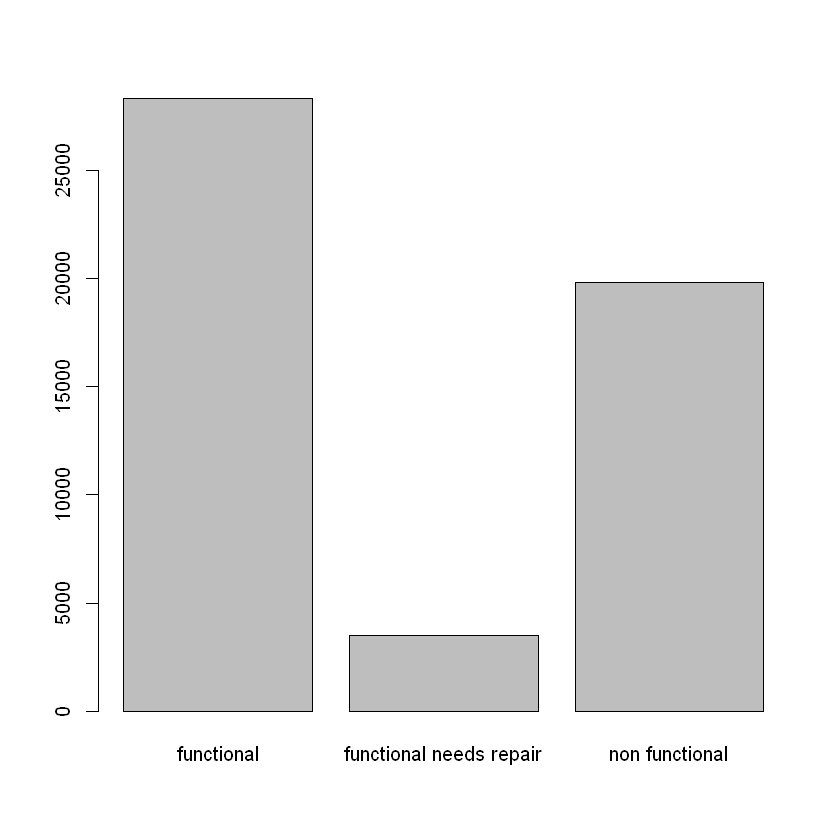

In [40]:
head(data_preproc)
dim(data_preproc)
barplot(table(data_preproc$status_group))

In [41]:
test_preproc <- preprocess_test2(eval_data)
save(test_preproc, file = "test_preproc.Rdata")

     id amount_tsh date_recorded                 funder gps_height  installer
1 50785          0         15740                   Dmdd       1996       DMDD
2 51630          0         15740 Government Of Tanzania       1569        DWE
3 17168          0         15737                              1567           
4 45559          0         15727             Finn Water        267 FINN WATER
5 49871        500         15791                 Bruder       1260     BRUDER
6 52449          0         15768 Government Of Tanzania       1685        DWE
  longitude   latitude                wpt_name num_private
1  35.29080  -4.059696 Dinamu Secondary School           0
2  36.65671  -3.309214                 Kimnyak           0
3  34.76786  -5.004344          Puma Secondary           0
4  38.05805  -9.418672          Kwa Mzee Pange           0
5  35.00612 -10.950412         Kwa Mzee Turuka           0
6  36.68528  -3.302420                  Masaga           0
                    basin subvillage  reg

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

  amount_tsh basin_Internal basin_Lake_Nyasa basin_Lake_Rukwa
1          0              1                0                0
2          0              0                0                0
3          0              1                0                0
4          0              0                0                0
5        500              0                0                0
6          0              0                0                0
  basin_Lake_Tanganyika basin_Lake_Victoria basin_Pangani basin_Rufiji
1                     0                   0             0            0
2                     0                   0             1            0
3                     0                   0             0            0
4                     0                   0             0            0
5                     0                   0             0            0
6                     0                   0             1            0
  basin_Ruvuma_/_Southern_Coast basin_Wami_/_Ruvu construction_year
1

In [42]:
dim(test_preproc)

[1] 14850   100

In [43]:
train_cols <- colnames(data_preproc)
for(c in colnames(test_preproc)) {
    if(!(c %in% train_cols)) {
        print(c)
    }
}

## Feature engineering

## Feature selection

# Model selection

## Model 1


In [152]:
library("nnet")

Warning message:
"package 'nnet' was built under R version 4.0.5"


In [51]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
   
    full_confusion_matrix <-matrix(0, nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    full_confusion_matrix[rownames(confusion_matrix),] <- confusion_matrix[rownames(confusion_matrix),]
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}


computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
 
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

In [13]:
library("nnet")
library("randomForest")
library("RSNNS")

#Cross validation
crossValidationInOutSample <- function(parameter,k,model_type){
    data <- data_preproc
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))
    
     # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)

    # 3. For each unique group:
    for (i in 1:k){
        if (model_type=="nnet" || model_type=="random_forest"){
            #3.1 Take the group as a hold out or test data set
            train_data <- data[-splits[[i]],]
            #3.2 Take the remaining groups as a training data set
            test_data <- data[splits[[i]],]
            Y <- test_data[,target_variable]
            print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
        }
        if (model_type=="radial" || model_type=="mlp"){
            train_data <- scaled[-splits[[i]],]
            train_label <- data[-splits[[i]],target_variable]
            test_data <- scaled[splits[[i]],]
            test_label <- data[splits[[i]],target_variable]
            n_train <- dim(train_data)[1]
            Y <- test_label
        } 
        #3.3 Fit a model on the training set and evaluate it on the test set
        if(model_type=="nnet"){
              model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,
                                 skip=FALSE, maxit=100,rang=0.2,MaxNWts=10000,trace=FALSE)
              Y_pred<-predict(model_single_out,test_data[,-target_variable])
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
     
        }
        if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            Y_hat <- predict(model_single_out,newdata = test_data[,-target_variable])
            
            #accuracy_vec[i] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
        }
        if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                           size=parameter, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
          Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]

        }
        if(model_type=="mlp"){
              model <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
              Y_pred <- predict(model,test_data)
              colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
         }


        accuracy_vec[i] <- computeResults(Y,Y_hat,paste(i,"fold"))

        }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    
    accuracy <- inOutSampleTest(data,scaled,target_variable,data_idx,half_split,parameter)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}




In [14]:
inOutSampleTest <- function(data,scaled,target_variable,data_idx,half_split,parameter){
     # 4.2 Split training-test for in/out of sample predictions
    if (model_type=="nnet" || model_type=="random_forest"){
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
    } 
    if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        n_train <- dim(train_data)[1]
    } 
    train_label <- data[data_idx[1:half_split],target_variable]
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    Y <- test_label
    if(model_type=="nnet"){
        model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=10000)

    } 
    if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            
    } 
    if (model_type=="radial"){
      model_single_out <- RSNNS::rbf(as.matrix(train_data),
                       decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                       size=parameter, 
                       maxit=75, 
                       #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                       #initFunc="RBF_Weights_Kohonen",
                       learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
    } 
    if(model_type=="mlp"){
          model_single_out <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
    } 
    
    if(model_type=="random_forest"){
        # In sample evaluation 
        Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
        # Out of sample evaluation 
        Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])
    }else{
        # In sample evaluation 
        Y_pred<-predict(model_single_out,train_data[,-target_variable])
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat_single_out_in_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
         # Out of sample evaluation 
        Y_pred<-predict(model_single_out,test_data[,-target_variable])
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat_single_out_out_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
    }
      
    #print(head(Y_hat_single_out_in_sample))  
    accuracy_in_sample <- computeResults(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}


In [15]:
applyCVInOutComp <- function(parameters,k,model_type){
    error_in_sample_vec <- numeric()
    error_out_sample_vec <- numeric()
    error_cv_vec <- numeric()

    for(parameter in parameters){
        print(paste("[INFO] - Testing h=",parameter))
        results <- crossValidationInOutSample(parameter,k,model_type)
        error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
        error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
        error_cv_vec <- c(error_cv_vec,results$cv)
    }
    save(error_in_sample_vec,error_out_sample_vec,error_cv_vec,file="CV.Rdata")
}
    

In [ ]:
model_type = "radial"
k <- 2
#parameters <- c(c(2,1),c(5,2),3)
parameters <- list(1,3,2)
load(file = "data_preproc.Rdata")
applyCVInOutComp(parameters,k,model_type)


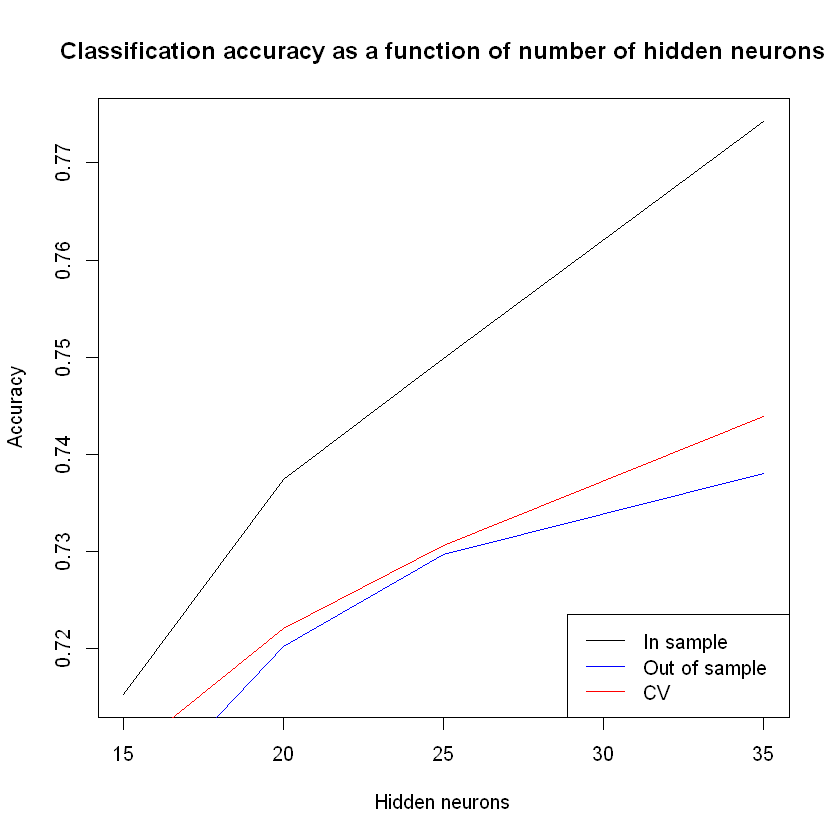

In [163]:
load("CV.Rdata")
plot(parameters,error_in_sample_vec,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy")
lines(parameters,error_in_sample_vec)
lines(parameters,error_out_sample_vec,col="blue")
lines(parameters,error_cv_vec,col="red")
legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))

In [49]:
#install.packages("RSNNS")
#install.packages("nnet")
library("nnet")
library("randomForest")
library("RSNNS")

BaggingNN <- function(n_bagging_resamples,model_type,hidden_nodes){
    
     ######################
    # TO DO 
    
    # manually select model names
    #model_names = seq(n_bagging_resamples)

    # create a list based on models names provided
    #list_models = lapply(model_names, get)

    # set names
    #names(list_models) = model_names
    ######################
    data <- data_preproc
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # 2. Normalize dataset
         data<-data.frame(data_n,data[,"status_group"])
         names(data)[length(names(data))]<-"status_group" 
         train_data <- data[data_idx[1:half_split],]
         test_data <- data[data_idx[(half_split+1):nrow(data)],]
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
         Y <- test_data[,target_variable]
    }
     if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        train_label <- data[data_idx[1:half_split],target_variable]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
        Y <- test_label
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
        print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=75,trace=F,rang=0.2,MaxNWts=20000)
           Y_pred <- predict(model,test_data[,-target_variable])
           print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

     }
     if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print(i)
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      accuracy_vec[i] <- computeResults(Y,result_classification,paste(i,"th model"),verbose=F)
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     #Y <- test_data[,target_variable]

     accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
     print(accuracy_bag)
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "radial"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                          #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 150)
      }
     Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
                           
     return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec))
}
print("done")


Warning message:
"package 'nnet' was built under R version 4.0.5"
Warning message:
"package 'RSNNS' was built under R version 4.0.5"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.0.5"


[1] "done"


In [56]:
model_names = seq(3)
model_names

[1] 1 2 3

In [310]:
#install.packages("RSNNS")
#install.packages("nnet")
library("nnet")
library("randomForest")
library("RSNNS")

Bagging_test <- function(n_bagging_resamples,model_type,hidden_nodes){
    data <- data_preproc
    target_variable <- ncol(data)
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # 2. Normalize dataset
         data<-data.frame(data_n,data[,"status_group"])
         names(data)[length(names(data))]<-"status_group" 
         train_data <- data[data_idx[1:half_split],]
         test_data <- test_preproc
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
    }
     if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx,]
        train_label <- data[data_idx,target_variable]
        test_data <- test_preproc
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
    print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=2, maxit=75,trace=F,rang=0.2,MaxNWts=20000)#to change ! (size)
           Y_pred <- predict(model,test_data)
           print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

     }
     if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print(i)
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=300,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "radial"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                          #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 150)
      }
     Y_pred_single_out <- predict(model_single_out,test_data)
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     return(list(single=Y_hat_single_out,bag=Y_hat_bagged))
}
print("done")


[1] "done"


In [54]:
load(file = "data_preproc.Rdata")
results <- BaggingNN(n_bagging_resamples=10,"mlp",hidden_nodes=c(32,16,8))


[1] "okkke-1-1"
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 1
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 2
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 3
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 4
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 5
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 6
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 7
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 8
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 9
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 10
[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12505                    1020           2806
  functional needs repair        232                     383            172
  non functional                1335                     322           7023
[1] "[INFO] - Accuracy bagged model : 0.771804015815179"
[1] "[INFO] - Misclassification rate bagged model : 0.228195984184821"
[1] 0.771804


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12687                    1043           3360
  functional needs repair        457                     498            310
  non functional                 928                     184           6331
[1] "[INFO] - Accuracy single model : 0.756492751376076"
[1] "[INFO] - Misclassification rate single model : 0.243507248623924"


In [432]:
Y_pred <- Bagging_test(n_bagging_resamples=1,"nnet",hidden_nodes=128)



[1] "okkke-1-1"
[1] "okkke11"
[1] "okkke22"
[1] "whaaat"
[1] 1
[1] "okk444"


In [433]:
print(length(Y_pred$single))
res <- cbind("id"=eval_data$id,"status_group"=as.character(Y_pred$single))

[1] 14850


In [434]:
head(res,30)
head(Y_pred$bag)
head(Y_pred$single)

id,status_group
50785,functional
51630,non functional
17168,non functional
45559,non functional
49871,non functional
52449,functional
24806,non functional
28965,non functional
36301,functional
54122,functional


[1] "functional"              "non functional"         
[3] "functional needs repair" "non functional"         
[5] "non functional"          "non functional"

[1] "functional"     "non functional" "non functional" "non functional"
[5] "non functional" "functional"

In [435]:
write.csv(res,"submission.csv",row.names=FALSE)

## Model 2


The second model that was implemented is a Random Forest. A hyperparameter of this model is the number of trees that is used. Different values for this hyperparameter were therefore tested in order to find the ont yielding the best solution in terms of accuracy.

In [45]:
library("randomForest")
#load(file = "data_preproc.Rdata")

Warning message:
"package 'randomForest' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [47]:
#n_trees <- c(4,6,8,10,12,14,16,18,20,22,24,26,28,30,32)
set.seed(5)
n_trees <- c(100)
data <- data_preproc
accuracy_vec <- array(0,length(n_trees))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)
index <- 1
best_accuracy <- 0

for (i in n_trees){
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i,keep.forest=TRUE)
    print(model$test$confusion)
    accuracy_vec[index] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    if(accuracy_vec[index] > best_accuracy) {
        best_model_ <- model
        best_accuracy <- accuracy_vec[index]
    }
    index <- index + 1
}
accuracy_vec

                        functional functional needs repair non functional
functional                   11894                     451           1771
functional needs repair        921                     456            392
non functional                2372                     229           7312
                        class.error
functional                0.1574100
functional needs repair   0.7422272
non functional            0.2623827


[1] 0.7621178

In [315]:
accuracy_vec
plot( c(4,6,8,10,12,14,16,18,20,22,24,26,28,30,32),accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

[1] 0.7621181

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [384]:
Y_pred <- predict(best_model_,newdata = test_preproc)
print(length(Y_pred))

[1] 14850


In [385]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(Y_pred))

In [329]:
head(test_preproc,30)

,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC2,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC3,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC4,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC5,PC50,PC6,PC7,PC8,PC9
1,-0.5257945,1.06471547,-4.6294452,-5.879981934,-2.9649885,-1.013949014,0.12017020,-1.322647693,1.19322808,1.4797748,-0.65212851,-2.51305923,-4.96202282,0.0304791903,0.12638107,-2.62339981,-4.70808332,0.90938716,-2.22390670,-0.28974354,-0.38281303,0.21520915,4.7335282,0.17112784,-0.48338473,3.7766557,-0.631313265,-1.18641638,-0.90691472,-0.072265199,-0.99474803,1.13693217,-0.007931919,-1.59437328,-1.18057959,-1.56555966,-0.15924607,-0.684011192,-1.65539436,0.42083219,-0.7556776,1.17851100,-0.31675217,1.19715563,-5.05783611,0.053265567,-2.67812714,0.51403398,1.66398262,-4.9525741
2,3.6797615,-1.50165235,-0.1274510,-2.625919754,-0.2608930,0.191994643,0.90304936,1.980178570,-0.88665767,-0.2326876,0.22115104,-0.01406686,2.10038402,-2.1996389470,-0.69020342,-0.26574121,1.03600165,-0.06563713,0.02099496,-0.27481986,0.97685660,-0.36848004,2.1021413,1.27457495,0.53529075,-0.7976193,-0.856136210,-0.40757413,-0.48332681,-0.327805890,-0.97846873,-1.85233835,0.580540273,-0.60721335,-0.33360993,1.45391014,0.81703289,0.178970010,-1.20106807,-0.99544752,-0.1592643,1.01724026,0.10716480,-0.13688030,1.85441671,0.027746678,-0.30627988,-0.16984891,0.37809306,-0.7301437
3,-1.2473337,0.07322357,-3.6410022,-3.235769076,-1.9087365,-0.418670576,-1.45559242,-1.627088154,2.09070933,0.4298780,1.39326598,-1.26043581,-2.70378275,-0.6654321526,-0.61829170,1.25557840,4.28094416,-0.30255975,-0.34382918,-1.12601152,-1.84668019,-4.91093803,2.7990754,1.76094088,-3.01502000,0.1322287,0.598729885,0.75208290,-0.73010702,-1.718445264,0.85177720,0.74594595,2.863917683,-1.40697379,3.67737268,0.39655918,-0.33433858,0.773080065,-0.91146532,-1.14178160,1.2182073,-1.76953824,-0.84617542,-2.93430331,-0.26509328,-2.322034557,-0.42709075,0.55970392,2.86662040,-2.5953221
4,-3.8610960,-2.19942955,-1.5519287,0.643008709,-1.2349829,-1.766971279,0.50536007,0.603665435,1.86596342,0.5221076,2.22541835,-2.17526303,-0.01359822,-1.2059897872,2.29929736,-1.05808938,0.47263209,-2.17858546,0.50438511,-0.91890985,1.45777748,-0.89107055,-2.2668598,-0.55920856,2.25695287,0.4355687,-0.914670851,2.69530161,-1.49465779,-0.815255767,-0.29676690,1.74977996,-0.128882440,-7.88428691,1.03377716,-1.14438210,-2.89388809,0.391741763,-1.12700547,-0.95098206,-2.9446051,-2.83688102,-0.41758465,-0.79146345,-0.68473841,-0.282102214,-2.99828423,-2.23882199,-0.11702894,-0.7438652
5,3.1882956,-0.44558986,0.4015659,0.004343887,2.7723814,-0.513782237,-1.95689465,-0.828544328,-0.90532568,3.4946852,0.40564491,0.38966882,-0.49006666,-0.5760246551,2.32704709,-0.96043739,0.45145981,1.63489344,-0.04182869,-1.21908734,-0.84801734,0.59557639,-0.9081166,-0.86974685,0.74132715,-0.3726409,-0.136050916,-0.42002397,0.89018414,1.003611465,0.19973602,-0.09930250,1.310281887,-2.92509537,-2.04535334,1.55654903,1.54447435,0.015850480,-1.87085535,2.65115026,0.2180391,-0.40125588,1.02967364,-2.29885827,-1.83575409,-1.251919131,0.63819142,0.49248401,-1.53519300,1.0734899
6,3.7654805,-0.76219538,-0.1208134,-2.261704782,-0.4259040,0.622221801,1.30879541,1.557304320,-0.37668600,0.1138156,0.06633436,0.07347764,1.93543746,-2.1704921479,-0.24958918,-0.15737286,0.81019497,0.45145871,-0.02591290,-0.16060574,0.93284442,-0.54648838,1.7772866,0.84596321,1.68909924,-0.9388022,-0.350849918,-0.57493491,0.20144978,-0.115522090,-1.52429441,-1.99937651,0.784739303,-0.61825515,-0.39410593,0.91801383,0.84643226,0.624606374,-1.37911915,-0.68831401,-0.4297368,1.32578618,0.17343285,0.19382427,1.66529571,0.229581733,-0.10703755,0.14605844,0.21485866,-0.6281183
7,-1.8932313,1.32153261,-1.6097497,-0.674878342,-0.5342553,-0.159604483,1.77411505,0.048479922,-0.33494867,-0.8408693,1.77486454,0.47151024,0.91357218,0.5438638834,1.48303767,0.81820679,-1.32512309,-0.11999110,1.48263886,0.63221988,1.09907491,0.71352462,-2.713

In [386]:
head(res,30)

id,status_group
50785,functional
51630,functional
17168,non functional
45559,non functional
49871,functional needs repair
52449,non functional
24806,functional
28965,non functional
36301,non functional
54122,functional


In [387]:
write.csv(res,"submission.csv",row.names=FALSE)

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





## Gradient boosting

In [ ]:
require(gbm)

In [ ]:
data <- data_preproc
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)

boost <- gbm(status_group ~ . ,data = train_data,distribution = "multinomial",cv.folds = 5,n.trees = 1000,shrinkage = 0.01, interaction.depth = 10)
boost
summary(boost)
best_iter <- gbm.perf(boost, method = "cv")
best_iter


In [ ]:
n.trees = seq(from=100 ,to=10000, by=100)
predmatrix<-predict(boost,test_data[,-target_variable],n.trees = n.trees)
dim(predmatrix) #dimentions of the Prediction Matrix
#Calculating The Mean squared Test Error
test.error<-with(test_data[,-target_variable],apply( (predmatrix-status_group)^2,2,mean))
head(test.error) #contains the Mean squared test error for each of the 100 trees averaged


In [ ]:
require(caret)

In [ ]:
data <- data_preproc
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)

fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

gbmGrid <-  expand.grid(interaction.depth = 3, 
                        n.trees = 2000, 
                        shrinkage = 0.01,n.minobsinnode = 1)
                        
nrow(gbmGrid)

set.seed(825)
gbmFit2 <- train(status_group ~ ., data = train_data, 
                 method = "gbm", 
                 verbose = TRUE, 
                 trControl = fitControl,
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit2

In [ ]:
confusionMatrix(gbmFit2)

In [ ]:
mPred = predict(gbmFit2, test_data, na.action = na.pass)
postResample(mPred, test_data$status_group)

In [ ]:
confusionMatrix(mPred, test_data$status_group)

In [ ]:
install.packages("xgboost")

In [ ]:
require(xgboost)

In [ ]:
data <- data_preproc
#print(head(data))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)
labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

best_param = list()
best_seednumber = 1234
best_loss = Inf
best_loss_index = 0

for (iter in 1:10) {
    param <- list(objective = "multi:softprob",
        eval_metric = "merror",
        num_class = 3,
        max_depth = sample(10:30, 1),
        eta = runif(1, .001, .1),
        gamma = runif(1, 0.0, 0.2),
        subsample = runif(1, .6, .9),
        colsample_bytree = runif(1, .5, .8), 
        min_child_weight = sample(1:40, 1),
        max_delta_step = sample(1:10, 1)
    )
    seed.number <- sample.int(10000, 1)[[1]]
    set.seed(seed.number)

    cv.nround <- 50
    cv.nfold <- 15

    bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param,
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T)
    
    #print(typeof(bstSparse))
    #print(bstSparse)
    #print("OKOK")
    #print(bstSparse[1])
    #print("OKOKOKOKO")
    min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
    min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
    message(min_loss_index)
    #print(bstSparse$evaluation_log)
    
    if (min_loss < best_loss) {
        best_loss <- min_loss
        best_loss_index <- min_loss_index
        best_seednumber <- seed.number
        best_param <- param
    }
}




In [ ]:
nround <- best_loss_index
set.seed(best_seednumber)
md <- xgboost(data = as.matrix(train_data[,-target_variable]),label=labels, params=best_param, nrounds=nround, nthread=6)


In [ ]:
pred <- predict(md, as.matrix(test_data[,-target_variable]),reshape = T)
head(pred)

In [ ]:
predicted_labels <- factor(max.col(pred),levels=1:3)
real_labels <- factor(as.numeric(test_data[,target_variable]))
predicted_labels

In [ ]:
caret::confusionMatrix(real_labels,predicted_labels)

In [ ]:
best_param

In [ ]:
pred <- predict(md, as.matrix(test_preproc),reshape = T)
head(pred)
pred <- factor(max.col(pred),levels=1:3)
pred <- ifelse(pred == 1,"functional",ifelse(pred == 2, "functional needs repair", "non functional"))
barplot(table(pred))

In [ ]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(pred))
head(res)

In [ ]:
write.csv(res,"submission.csv",row.names=FALSE)

# Conclusions